# 线性回归

In [1]:
import torch
from time import time
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
import torch.utils.data as Data

## tensor sum

In [2]:
a = torch.ones(1000)
b = torch.ones(1000)

**method 1: piecewise sum**

In [3]:
start = time()
c = torch.ones(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)

0.008538007736206055


**method 2: vector sum**

In [4]:
start = time()
c = a + b
print(time() - start)

0.0002067089080810547


## generate dataset

In [5]:
num_inputs = 2
num_examples = 1000
t_w = [2., -3.] # true weights
t_b = 1. # true biases

features = torch.randn(num_examples, num_inputs, dtype=torch.float)
labels = t_w[0] * features[:, 0] + t_w[1] * features[:, 1] + t_b
# add noise
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

print(features.shape)
print(labels.shape)

torch.Size([1000, 2])
torch.Size([1000])


## show dataset

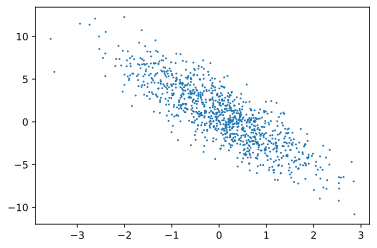

In [6]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
    
def set_figsize(fig_size=(6, 4)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = fig_size

set_figsize()

plt.scatter(features[:,1].numpy(), labels.numpy(), 1)

In [7]:
batch_size = 100

dataset = Data.TensorDataset(features, labels)
data_generator = Data.DataLoader(dataset, batch_size, shuffle=True)

In [8]:
# read data batch
for x, y in data_generator:
    print(x, y)
    break

tensor([[-3.2264e-01,  6.4545e-02],
        [ 1.4982e+00,  3.7317e-01],
        [-5.5898e-01,  7.0202e-01],
        [ 8.8179e-01,  9.7583e-01],
        [ 4.4995e-01,  4.4509e-01],
        [-2.8199e-02,  2.6103e-01],
        [ 3.6625e-01, -5.2945e-01],
        [-1.6347e-01,  4.9283e-01],
        [-1.0014e+00,  1.3256e-01],
        [ 9.9988e-01, -1.2849e+00],
        [ 1.1459e+00, -1.2618e+00],
        [-1.2926e+00,  6.2825e-01],
        [-7.3605e-01, -8.0352e-01],
        [-1.8825e-02,  1.0781e+00],
        [-3.5599e-02, -2.5325e+00],
        [-3.6710e-01, -2.7910e-01],
        [ 3.4606e-01, -4.7348e-01],
        [ 3.3020e-01,  1.0798e+00],
        [ 1.3931e+00, -8.3255e-02],
        [ 8.4980e-01,  7.9408e-01],
        [ 7.3185e-01, -1.6641e+00],
        [ 3.9525e-01,  7.6993e-01],
        [ 7.4751e-01,  6.8573e-01],
        [ 1.9593e+00, -4.3766e-01],
        [-1.0489e-01, -2.4072e+00],
        [ 1.5494e+00,  4.5408e-01],
        [ 2.5495e+00,  5.8421e-01],
        [ 1.5086e+00,  1.023

## initial model parameter

In [9]:
# initial w and b
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [10]:
# set requires grad
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

## define model

In [11]:
def linear_regression(x, w, b):
    return torch.mm(x, w) + b

## define loss function

In [12]:
def squared_loss(y_pred, y):
    return (y_pred - y.view(y_pred.size())) ** 2

## define optimizer

In [13]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

## train model

In [14]:
lr = 0.01
num_epochs = 20
net = linear_regression
loss = squared_loss

for epoch in range(num_epochs):
    for x, y in data_generator:
        l = loss(net(x, w, b), y).sum()  # computer batch loss
        l.backward() # use loss to compute grad
        sgd([w, b], lr, batch_size) # updata parameter
        
        # zero clearn grad
        w.grad.data.zero_()
        b.grad.data.zero_()
        
    epoch_loss = loss(net(features, w, b), labels).mean() # epoch loss
    print('epoch {} => loss {:.4}'.format(epoch+1, epoch_loss))
        

epoch 1 => loss 9.19
epoch 2 => loss 6.221
epoch 3 => loss 4.213
epoch 4 => loss 2.855
epoch 5 => loss 1.936
epoch 6 => loss 1.314
epoch 7 => loss 0.8918
epoch 8 => loss 0.6058
epoch 9 => loss 0.4117
epoch 10 => loss 0.2799
epoch 11 => loss 0.1904
epoch 12 => loss 0.1296
epoch 13 => loss 0.08826
epoch 14 => loss 0.06013
epoch 15 => loss 0.041
epoch 16 => loss 0.02797
epoch 17 => loss 0.0191
epoch 18 => loss 0.01306
epoch 19 => loss 0.008941
epoch 20 => loss 0.006133


In [15]:
print(t_w, '<=>', w.data)
print(t_b, '<=>', b.data)

[2.0, -3.0] <=> tensor([[ 1.9537],
        [-2.9445]])
1.0 <=> tensor([0.9653])
